In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

In [2]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
# device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem']
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


In [11]:
def bv_algorithm(s, n):
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    

    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)
    
    return bv_circuit

def bv_mal(copies, mal_type):
    s = '01'
    n = 2
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
#     bv_circuit = QuantumCircuit(n+1, n)
#     bv_circuit = QuantumCircuit(5, 4)
#     bv_circuit = QuantumCircuit(7, 6)
    
    if (mal_type == 'M10' or mal_type == 'M11'):
        qr = n+5
        cr = qr-1
    
    elif (mal_type == 'M9'):
        qr = n+4
        cr = qr - 1
        
    elif (mal_type == 'M12' or mal_type == 'M0'):
        qr = n + 1 
        cr = qr-1
    else:
        qr = n+3 
        cr = qr-1
    
    bv_circuit = QuantumCircuit(qr, cr)
    
    bv_circuit.barrier()
    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)
    
    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
#     bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
#     bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    
#     for i in range(copies):
#         bv_circuit.z(3)
#         bv_circuit.cx(3,4)
#         bv_circuit.cx(4,5)
#         bv_circuit.delay(0, qarg = 3)
#         bv_circuit.cx(4,5)
        
#         bv_circuit.h(3)
#         bv_circuit.delay(0, qarg = 3)
#         bv_circuit.h(3)
#         bv_circuit.delay(0, qarg = 3)
#         bv_circuit.cx(4,3)
#         bv_circuit.delay(0, qarg = 3)
 
#         if i%2==1:
#             bv_circuit.cx(4,3)
#             bv_circuit.cx(5,4)
#             bv_circuit.cx(6,5)
#             bv_circuit.delay(0, qarg = 6)
#         else:
#             bv_circuit.cx(6,5)
#             bv_circuit.cx(5,4)
#             bv_circuit.cx(4,3)
#             bv_circuit.delay(0, qarg = 3)

############ MALICIOUS CIRCUIT #####################
    if (mal_type == 'M12'):
        bv_circuit.barrier()
        bv_circuit.delay(5*10**copies, unit = 'dt')
    
    else:
        for i in range(copies):
            if (mal_type == 'M1'):
                bv_circuit.cx(3,4)

            if (mal_type == 'M2'):
                bv_circuit.cx(3,4)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M3'):
                bv_circuit.cx(3,4)
                bv_circuit.delay(0, qarg=3, unit = 'dt')
                bv_circuit.cx(4,3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M4'):
                bv_circuit.cx(3,4)
                bv_circuit.h(3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')
                bv_circuit.h(3)

            if (mal_type == 'M5'):
                bv_circuit.x(3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M6'):
                bv_circuit.y(3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M7'):
                bv_circuit.z(3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M8'):
                bv_circuit.h(3)
                bv_circuit.delay(0, qarg=3, unit = 'dt')

            if (mal_type == 'M9'):
                bv_circuit.cx(3,4)
                bv_circuit.cx(4,5)

            if (mal_type == 'M10'):
                if i%2==1:
                    bv_circuit.cx(4,3)
                    bv_circuit.cx(5,4)
                    bv_circuit.cx(6,5)
                    bv_circuit.delay(0, qarg = 6)
                else:
                    bv_circuit.cx(6,5)
                    bv_circuit.cx(5,4)
                    bv_circuit.cx(4,3)
                    bv_circuit.delay(0, qarg = 3)

            if (mal_type == 'M11'):
                bv_circuit.cx(5,6)
                bv_circuit.delay(0, qarg=4, unit = 'dt')


            
####################################################
    bv_circuit.barrier()
    # Measurement
#     for i in range(n):
#         bv_circuit.measure(i, i)
    bv_circuit.measure(0, 0)
    bv_circuit.measure(1, 1)
    
    if (mal_type == 'M9'):
        bv_circuit.measure(3, 2)
        bv_circuit.measure(4, 3)
        bv_circuit.measure(5, 4) 
    
    elif (mal_type == 'M10'):
        bv_circuit.measure(3, 2)
        bv_circuit.measure(4, 3)
        bv_circuit.measure(5, 4)
        bv_circuit.measure(6, 5)
        
    elif (mal_type == 'M0' or mal_type == 'M12'):
        pass
    
    else:
        bv_circuit.measure(3, 2)
        bv_circuit.measure(4, 3)
#     bv_circuit.measure(5, 4)
#     bv_circuit.measure(6, 5)
    
    
    return bv_circuit    

In [23]:
# b1 = bv_algorithm('10', 2)
bv = bv_mal(100,'M5')
# print(b1)
print(bv)

      ░ ┌───┐                          ┌───┐                                »
q_0: ─░─┤ H ├──────────────────■───────┤ H ├────────────────────────────────»
      ░ ├───┤     ┌───┐        │       ├───┤                                »
q_1: ─░─┤ H ├─────┤ I ├────────┼───────┤ H ├────────────────────────────────»
      ░ ├───┤     ├───┤      ┌─┴─┐     └───┘                                »
q_2: ─░─┤ H ├─────┤ Z ├──────┤ X ├──────────────────────────────────────────»
      ░ ├───┤┌────┴───┴─────┐├───┤┌──────────────┐┌───┐┌──────────────┐┌───┐»
q_3: ─░─┤ X ├┤ Delay(0[dt]) ├┤ X ├┤ Delay(0[dt]) ├┤ X ├┤ Delay(0[dt]) ├┤ X ├»
      ░ └───┘└──────────────┘└───┘└──────────────┘└───┘└──────────────┘└───┘»
q_4: ─░─────────────────────────────────────────────────────────────────────»
      ░                                                                     »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

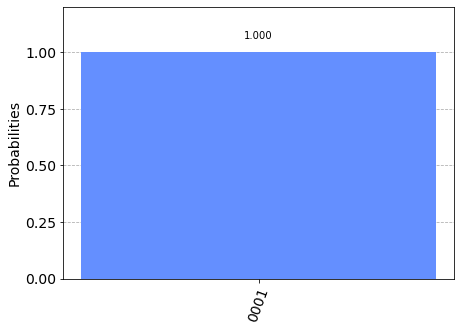

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(bv, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Running on device:  ibmq_belem


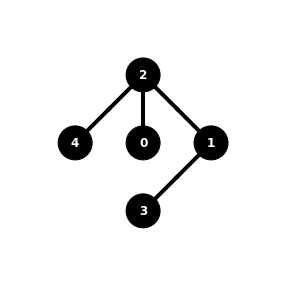

In [25]:
backend = device[5]
print("Running on device: ", backend)
from qiskit.tools.monitor import job_monitor
# transpiled_bv = transpile(bv, backend, optimization_level=3, scheduling_method='alap')

transpiled_bv = transpile(bv, backend, optimization_level=3, scheduling_method='alap', seed_transpiler = 2 )
# transpiled_bv = transpile(bv, backend, optimization_level=3, scheduling_method='alap', seed_transpiler = 10 )

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(transpiled_bv, backend = backend)


In [26]:
job = backend.run(transpiled_bv)
job_monitor(job, interval=2)

Job Status: job has successfully run


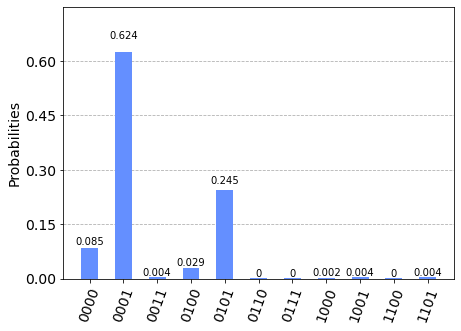

In [27]:
results = job.result()
answer = results.get_counts(bv)
plot_histogram(answer)

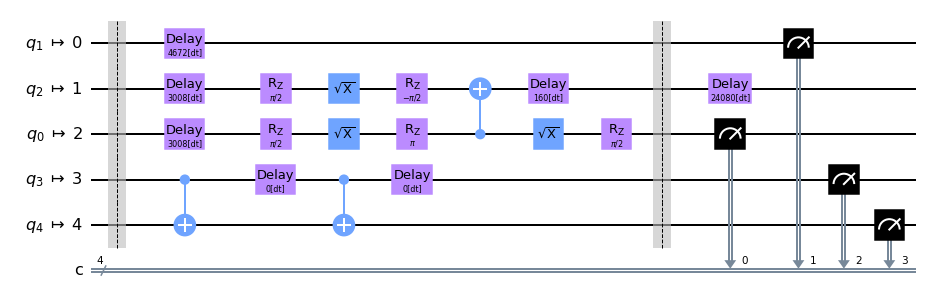

In [125]:
transpiled_bv.draw('mpl')

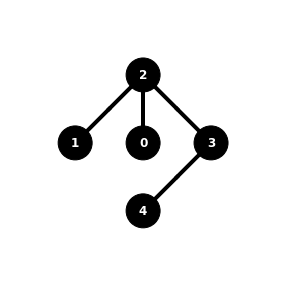

In [126]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(transpiled_bv, backend = device[0])

In [34]:
from qiskit.tools.monitor import job_monitor
import winsound
import time

iterations = 3
f = open("BV_M10", "w")
backend = device[6]
answer= [0]*iterations
f.write(str(backend))
f.write(str("\n"))
for i in range(0,iterations,1):
    bv = bv_mal(i, 'M10')
    print("Running on device: ", backend)
    transpiled_bv = transpile(bv, backend, optimization_level=3, scheduling_method='alap')
#     transpiled_bv = transpile(bv, backend, optimization_level=0, scheduling_method='alap')
    job = backend.run(transpiled_bv) 
    job_monitor(job, interval=2)

    results = job.result()
    answer[i] = results.get_counts()
    
    prob = int(answer[i]['000001'])/1000
    print(i, prob)
    f.write(str(i))
    f.write(str(", "))
    f.write(str(prob))
    f.write(str("\n"))
    
f.close()

# Beeper
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
for i in range(10):
    winsound.Beep(frequency, duration)
    time.sleep(1)

Running on device:  ibmq_casablanca
Job Status: job has successfully run
0 0.849
Running on device:  ibmq_casablanca
Job Status: job has successfully run
1 0.832
Running on device:  ibmq_casablanca
Job Status: job has successfully run
2 0.767


KeyboardInterrupt: 

In [19]:
answer[30]

{'0010': 80, '0011': 828, '0110': 9, '0111': 95, '1011': 11, '1111': 1}

# Duration Analysis Code

In [15]:
transpiled_bv = [0]*len(device)
for i in range(len(device)):
    print("============================================")
    print(device[i])
#     transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    transpiled_bv[i] = transpile(bv, device[i], optimization_level=3, scheduling_method='alap')
    print(transpiled_bv[i])
    print("============================================")

ibmq_lima
                   ┌─────────┐     ┌────┐┌─────────┐  ░ ┌─────────────────┐ ░ »
      q_0 -> 0 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░─┤ Delay(1504[dt]) ├─░─»
                   ├─────────┤     ├────┤├─────────┤  ░ └─────────────────┘ ░ »
      q_1 -> 1 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░──────────■──────────░─»
                   ├─────────┤     ├────┤├─────────┴┐ ░        ┌─┴─┐        ░ »
      q_2 -> 2 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(-π/2) ├─░────────┤ X ├────────░─»
               ┌───┴─────────┴────┐└────┘└──────────┘ ░        └───┘        ░ »
ancilla_0 -> 3 ┤ Delay(25904[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_1 -> 4 ┤ Delay(25904[dt]) ├───────────────────────────────────────────»
               └──────────────────┘                                           »
          c: 2/═══════════════════════════════════════════════════════════════»
                              

                   ┌─────────┐     ┌────┐┌─────────┐  ░ ┌─────────────────┐ ░ »
      q_0 -> 0 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░─┤ Delay(1824[dt]) ├─░─»
                   ├─────────┤     ├────┤├─────────┤  ░ └─────────────────┘ ░ »
      q_1 -> 1 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░──────────■──────────░─»
                   ├─────────┤     ├────┤├─────────┴┐ ░        ┌─┴─┐        ░ »
      q_2 -> 2 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(-π/2) ├─░────────┤ X ├────────░─»
               ┌───┴─────────┴────┐└────┘└──────────┘ ░        └───┘        ░ »
ancilla_0 -> 3 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_1 -> 4 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_2 -> 5 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤     

ibm_perth


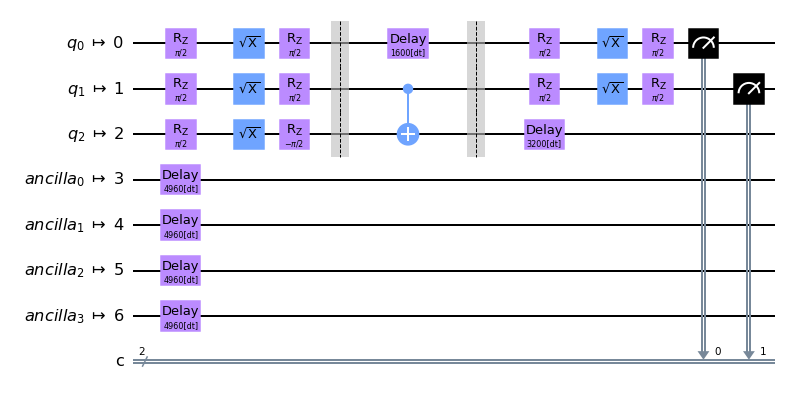

In [27]:
j = 9
print(device[j])
transpiled_bv[j].draw('mpl')

In [30]:
q =  QuantumCircuit(2)
q.cx(0,1)
print(q)

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


In [32]:
transpiled_q = [0]*len(device)
for i in range(len(device)):
    print("============================================")
    print(device[i])
#     transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    print(transpiled_q[i])
    print("============================================")

ibmq_lima
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ Delay(1376[dt]) ├
               ├─────────────────┤
ancilla_1 -> 3 ┤ Delay(1376[dt]) ├
               ├─────────────────┤
ancilla_2 -> 4 ┤ Delay(1376[dt]) ├
               └─────────────────┘
ibmq_bogota
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ Delay(3104[dt]) ├
               ├─────────────────┤
ancilla_1 -> 3 ┤ Delay(3104[dt]) ├
               ├─────────────────┤
ancilla_2 -> 4 ┤ Delay(3104[dt]) ├
               └─────────────────┘
ibmq_santiago
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ De